# Music Genre Classifier - CNN I

In [2]:
path = 'C:/Users/Thank/Documents/GraduateSchool/EAS510/Final Project/genres_original/'

In [3]:
import os
subFolderList = []
for x in os.listdir(path):
    if os.path.isdir(path + '/' + x):
        subFolderList.append(x)

##### Genre Labels

In [4]:
subFolderList

['blues',
 'classical',
 'country',
 'disco',
 'hiphop',
 'jazz',
 'metal',
 'pop',
 'reggae',
 'rock']

In [5]:
from scipy import signal
from scipy.io import wavfile
import matplotlib.pyplot as plt
import librosa
import librosa.display
import IPython.display as ipd
import numpy as np
from pylab import rcParams
rcParams['figure.figsize'] = 15, 8

##### Function to convert audio to spectrogram

In [6]:
def log_specgram(audio, sample_rate, window_size=20,
                 step_size=10, eps=1e-10):
    nperseg = int(round(window_size * sample_rate / 1e3))
    noverlap = int(round(step_size * sample_rate / 1e3))
    freqs, _, spec = signal.spectrogram(audio,
                                    fs=sample_rate,
                                    window='hann',
                                    nperseg=nperseg,
                                    noverlap=noverlap,
                                    detrend=False)
    return freqs, np.log(spec.T.astype(np.float32) + eps)

In [7]:
def wav2img_waveform(wav_path, targetdir='', figsize=(4,4)):
    samplerate,test_sound  = wavfile.read(wav_path)
    fig = plt.figure(figsize=figsize)
    plt.plot(test_sound)
    plt.axis('off')
    ## create output path
    output_file = wav_path.split('/')[-1].split('.wav')[0]
    output_file = output_file.replace('.','')
    
    plt.savefig(output_file + '.png')
    plt.close()

In [10]:
path = 'C:/Users/Thank/Documents/GraduateSchool/EAS510/Final Project/genres_original/'
spect_path = 'C:/Users/Thank/Documents/GraduateSchool/EAS510/Final Project/output2/'

for i, x in enumerate(['jazz']):
    print(i, ':', x)
    # get all the wave files
    all_files = [y for y in os.listdir(path + x) if '.wav' in y]
    os.makedirs(spect_path+x)
    os.chdir(spect_path+x)
    for file in all_files:
        wav2img_waveform(path + x + '/' + file, spect_path + x)

0 : jazz


##### Function to convert waveform to image

In [7]:
def wav2img(wav_path, targetdir='', figsize=(4,4)):
    """
    takes in wave file path
    and the fig size. Default 4,4 will make images 288 x 288
    """
    plt.figure(figsize=figsize)  
    # use soundfile library to read in the wave files
    try:
        samplerate, test_sound  = wavfile.read(wav_path)
        _, spectrogram = log_specgram(test_sound, samplerate)

        ## create output path
        output_file = wav_path.split('/')[-1].split('.wav')[0]
        output_file = output_file.replace('.','')

        #plt.imshow(spectrogram.T, aspect='auto', origin='lower')
        plt.imsave(output_file + '.png', spectrogram)
        plt.close()
    except:
        print(wav_path)

##### Convert all the wav files to images

In [8]:
path = 'C:/Users/Thank/Documents/GraduateSchool/EAS510/Final Project/genres_original/'
spect_path = 'C:/Users/Thank/Documents/GraduateSchool/EAS510/Final Project/output/'

for i, x in enumerate(subFolderList):
    print(i, ':', x)
    # get all the wave files
    all_files = [y for y in os.listdir(path + x) if '.wav' in y]
    os.makedirs(spect_path+x)
    os.chdir(spect_path+x)
    for file in all_files:
        wav2img(path + x + '/' + file, spect_path + x)

0 : blues
1 : classical
2 : country
3 : disco
4 : hiphop
5 : jazz
6 : metal
7 : pop
8 : reggae
9 : rock


##### Split the images in categorical folders into train and test with 65:35 ratio

In [57]:
spect_path = 'C:/Users/Thank/Documents/GraduateSchool/EAS510/Final Project/output/'
output = 'C:/Users/Thank/Documents/GraduateSchool/EAS510/Final Project/split/'
import split_folders
split_folders.ratio(spect_path, output=output, seed=1337, ratio=(.65,.35)) # default values

Copying files: 1000 files [00:45, 21.82 files/s]


In [6]:
import cv2

##### Function to collect image data and labels separately

In [25]:
def createXY(path, subFolderList):
    data = []
    labels = []
    for i,x in enumerate(subFolderList):
        all_files = [y for y in os.listdir(path + x) if '.png' in y]
        for file in all_files:
            image = cv2.imread(path+x+'/'+file)
            image = cv2.resize(image, (50, 50))
            data.append(image)
            labels.append(x)
    return data, labels

##### Split train and test into X and Y

In [26]:
train_path = 'C:/Users/Thank/Documents/GraduateSchool/EAS510/Final Project/split/train/'
trainX, trainY = createXY(train_path, subFolderList)

In [27]:
test_path = 'C:/Users/Thank/Documents/GraduateSchool/EAS510/Final Project/split/val/'
testX, testY = createXY(test_path, subFolderList)

In [28]:
trainX = np.array(trainX)
trainY = np.array(trainY)

In [29]:
testX = np.array(testX)
testY = np.array(testY)

In [20]:
train_path = 'C:/Users/Thank/Documents/GraduateSchool/EAS510/Final Project/split2/train/'
trainX2, trainY2 = createXY(train_path, subFolderList)

In [21]:
test_path = 'C:/Users/Thank/Documents/GraduateSchool/EAS510/Final Project/split2/val/'
testX2, testY2 = createXY(test_path, subFolderList)

In [22]:
trainX2 = np.array(trainX2)
trainY2 = np.array(trainY2)
testX2 = np.array(testX2)
testY2 = np.array(testY2)

##### Dimensions of trainX, trainY, testX, testY

In [15]:
print(trainX.shape)
print(trainY.shape)
print(testX.shape)
print(testY.shape)

(650, 50, 50, 3)
(650,)
(350, 50, 50, 3)
(350,)


##### Sample spectrogram image

'blues'

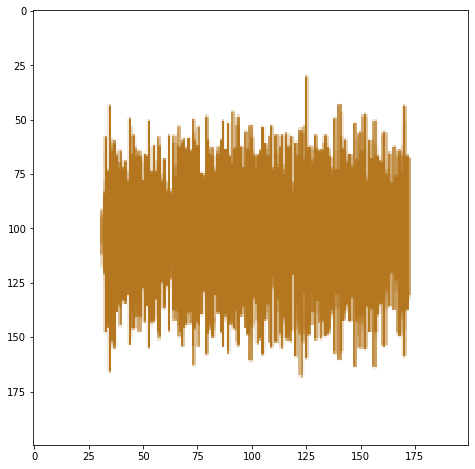

In [45]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 8
plt.imshow(trainX2[0])
display(trainY2[0])

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

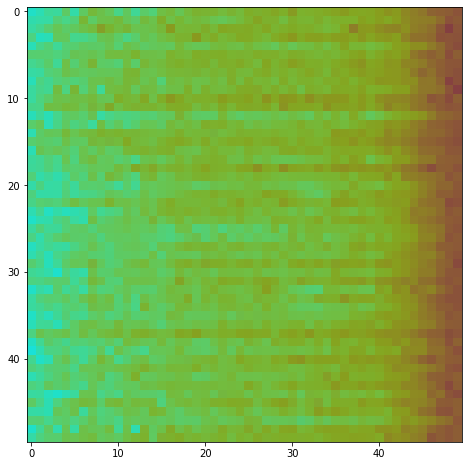

In [46]:
plt.imshow(trainX[0])
display(trainY[0])

'blues'

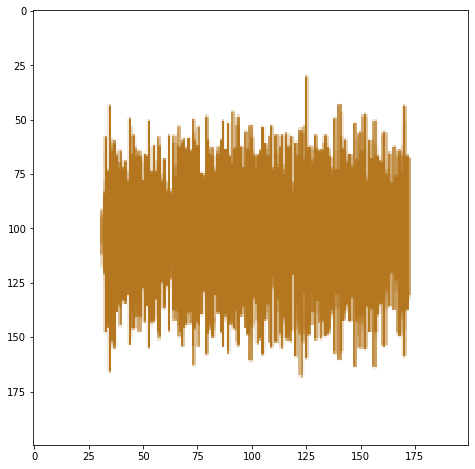

In [47]:
plt.imshow(trainX2[0])
display(trainY2[0])

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

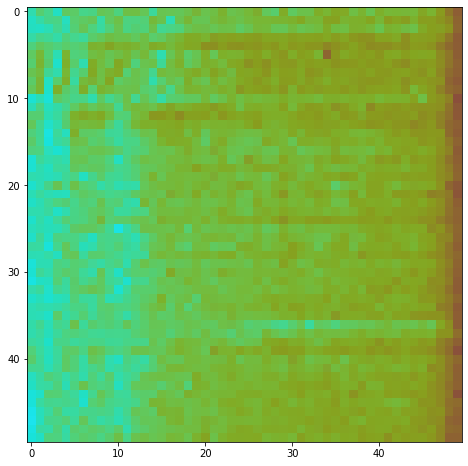

In [48]:
plt.imshow(testX[52])
display(testY[52])

In [32]:
import pandas as pd

tX = pd.DataFrame(trainY, columns = ['category'])
tX.category = pd.Categorical(tX.category)
encoding_genre = {"Genre": dict(zip(tX['category'],tX['category'].cat.codes))}
tX.category = tX.category.cat.codes
tX = tX.to_numpy()
trainY = tX.flatten()
display(trainY.shape)

vx = pd.DataFrame(testY, columns = ['category'])
vx.category = pd.Categorical(vx.category)
encoding_genre2 = {"Genre": dict(zip(vx['category'],vx['category'].cat.codes))}
vx.category = vx.category.cat.codes
vx = vx.to_numpy()
testY = vx.flatten()
display(testY.shape)

display(encoding_genre)

(650,)

(350,)

{'Genre': {'blues': 0,
  'classical': 1,
  'country': 2,
  'disco': 3,
  'hiphop': 4,
  'jazz': 5,
  'metal': 6,
  'pop': 7,
  'reggae': 8,
  'rock': 9}}

In [33]:
num_classes = 10
input_shape = (50, 50, 3)

trainX = trainX.astype('float32')
testX = testX.astype('float32')
trainX /= 255
testX /= 255
print('trainX shape:', trainX.shape)
print('testX shape:', testX.shape)

print(trainX.shape[0], 'train samples')
print(testX.shape[0], 'test samples')

trainX shape: (650, 50, 50, 3)
testX shape: (350, 50, 50, 3)
650 train samples
350 test samples


In [34]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras import regularizers
from keras.layers import BatchNormalization
from keras.layers import LeakyReLU
from keras import regularizers
from keras.layers import BatchNormalization
from keras.layers import LeakyReLU

##### One Hot Encoding

In [35]:
num_classes = 10
e = 12
bs = 32
input_shape = (50, 50, 3)

In [36]:
num_classes = 10
trainY = keras.utils.to_categorical(trainY, num_classes)
testY = keras.utils.to_categorical(testY, num_classes)

##### Basic Convolution Neural Network

#### When experimenting with the waveform images, it seems it's not enough description to differentiat between the genres, so we are only using the logarithmic mel frequencies for this CNN. Our CNN model consists of 3 convolutional layers using 3x3 filters and relu activation. We added max pooling and batch normalization to improve accuracy. We have one fully connected layer with a dropout of 0.3. Our output layer uses softmax activation. 

In [57]:
model = keras.Sequential()
# 1st conv layer
model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
model.add(keras.layers.BatchNormalization())
# 2nd conv layer
model.add(keras.layers.Conv2D(32, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
model.add(keras.layers.BatchNormalization())
# 3rd conv layer
model.add(keras.layers.Conv2D(32, (2, 2), activation='relu'))
model.add(keras.layers.MaxPooling2D((2, 2), strides=(2, 2), padding='same'))
model.add(keras.layers.BatchNormalization())
# flatten output and feed it into dense layer
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.3))
# output layer
model.add(keras.layers.Dense(10, activation='softmax'))

In [58]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 48, 48, 32)        896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 24, 24, 32)        0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 24, 24, 32)        128       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 22, 22, 32)        9248      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 11, 11, 32)        0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 11, 11, 32)        128       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 10, 10, 32)       

In [59]:
from keras import optimizers
model.compile(loss='categorical_crossentropy',
   optimizer=keras.optimizers.Adam(learning_rate=0.0001),
   metrics=['acc'])

In [60]:
history = model.fit(trainX, trainY, 
   epochs=60,
   batch_size=bs, 
   validation_data=(testX, testY),verbose = 1)

Epoch 1/60
21/21 [==============================] - ETA: 0s - loss: 3.0105 - acc: 0.125 - ETA: 1s - loss: 3.3133 - acc: 0.140 - ETA: 1s - loss: 3.3434 - acc: 0.104 - ETA: 1s - loss: 3.3424 - acc: 0.093 - ETA: 1s - loss: 3.2933 - acc: 0.106 - ETA: 1s - loss: 3.1722 - acc: 0.114 - ETA: 1s - loss: 3.0834 - acc: 0.138 - ETA: 1s - loss: 3.0671 - acc: 0.152 - ETA: 1s - loss: 3.0736 - acc: 0.156 - ETA: 1s - loss: 3.0247 - acc: 0.171 - ETA: 1s - loss: 2.9814 - acc: 0.170 - ETA: 1s - loss: 2.9589 - acc: 0.166 - ETA: 1s - loss: 2.9382 - acc: 0.168 - ETA: 0s - loss: 2.9410 - acc: 0.160 - ETA: 0s - loss: 2.9360 - acc: 0.158 - ETA: 0s - loss: 2.9175 - acc: 0.164 - ETA: 0s - loss: 2.9122 - acc: 0.161 - ETA: 0s - loss: 2.8923 - acc: 0.168 - ETA: 0s - loss: 2.8766 - acc: 0.172 - ETA: 0s - loss: 2.8755 - acc: 0.176 - ETA: 0s - loss: 2.8761 - acc: 0.173 - 4s 175ms/step - loss: 2.8761 - acc: 0.1738 - val_loss: 2.3068 - val_acc: 0.0971
Epoch 2/60
21/21 [==============================] - ETA: 0s - loss: 2.

Epoch 10/60
21/21 [==============================] - ETA: 0s - loss: 1.6317 - acc: 0.437 - ETA: 1s - loss: 1.5393 - acc: 0.421 - ETA: 1s - loss: 1.5192 - acc: 0.427 - ETA: 1s - loss: 1.5241 - acc: 0.460 - ETA: 1s - loss: 1.4975 - acc: 0.468 - ETA: 1s - loss: 1.5065 - acc: 0.458 - ETA: 1s - loss: 1.5461 - acc: 0.450 - ETA: 1s - loss: 1.5282 - acc: 0.460 - ETA: 1s - loss: 1.5395 - acc: 0.451 - ETA: 1s - loss: 1.5509 - acc: 0.450 - ETA: 1s - loss: 1.5583 - acc: 0.451 - ETA: 1s - loss: 1.5648 - acc: 0.437 - ETA: 1s - loss: 1.5967 - acc: 0.423 - ETA: 1s - loss: 1.5959 - acc: 0.430 - ETA: 0s - loss: 1.5903 - acc: 0.427 - ETA: 0s - loss: 1.5798 - acc: 0.425 - ETA: 0s - loss: 1.5794 - acc: 0.426 - ETA: 0s - loss: 1.5597 - acc: 0.434 - ETA: 0s - loss: 1.5582 - acc: 0.435 - ETA: 0s - loss: 1.5494 - acc: 0.440 - ETA: 0s - loss: 1.5483 - acc: 0.440 - 3s 158ms/step - loss: 1.5483 - acc: 0.4400 - val_loss: 2.3002 - val_acc: 0.1314
Epoch 11/60
21/21 [==============================] - ETA: 0s - loss: 

21/21 [==============================] - ETA: 0s - loss: 1.2933 - acc: 0.406 - ETA: 1s - loss: 1.4110 - acc: 0.406 - ETA: 1s - loss: 1.3386 - acc: 0.447 - ETA: 1s - loss: 1.3539 - acc: 0.437 - ETA: 1s - loss: 1.2661 - acc: 0.493 - ETA: 1s - loss: 1.2751 - acc: 0.505 - ETA: 1s - loss: 1.2797 - acc: 0.504 - ETA: 1s - loss: 1.2804 - acc: 0.519 - ETA: 1s - loss: 1.2860 - acc: 0.527 - ETA: 1s - loss: 1.2760 - acc: 0.534 - ETA: 1s - loss: 1.2757 - acc: 0.534 - ETA: 1s - loss: 1.2665 - acc: 0.539 - ETA: 1s - loss: 1.2513 - acc: 0.555 - ETA: 0s - loss: 1.2607 - acc: 0.558 - ETA: 0s - loss: 1.2593 - acc: 0.558 - ETA: 0s - loss: 1.2570 - acc: 0.560 - ETA: 0s - loss: 1.2570 - acc: 0.560 - ETA: 0s - loss: 1.2554 - acc: 0.562 - ETA: 0s - loss: 1.2609 - acc: 0.560 - ETA: 0s - loss: 1.2521 - acc: 0.568 - ETA: 0s - loss: 1.2510 - acc: 0.566 - 3s 154ms/step - loss: 1.2510 - acc: 0.5662 - val_loss: 2.2212 - val_acc: 0.1743
Epoch 19/60
21/21 [==============================] - ETA: 0s - loss: 1.2161 - acc

21/21 [==============================] - ETA: 0s - loss: 0.7720 - acc: 0.812 - ETA: 1s - loss: 1.0121 - acc: 0.656 - ETA: 1s - loss: 0.9458 - acc: 0.729 - ETA: 1s - loss: 0.9786 - acc: 0.687 - ETA: 1s - loss: 1.0104 - acc: 0.656 - ETA: 1s - loss: 0.9807 - acc: 0.682 - ETA: 1s - loss: 0.9785 - acc: 0.678 - ETA: 1s - loss: 0.9906 - acc: 0.683 - ETA: 1s - loss: 0.9596 - acc: 0.694 - ETA: 1s - loss: 0.9789 - acc: 0.684 - ETA: 1s - loss: 0.9629 - acc: 0.687 - ETA: 1s - loss: 0.9489 - acc: 0.697 - ETA: 1s - loss: 0.9473 - acc: 0.701 - ETA: 0s - loss: 0.9406 - acc: 0.709 - ETA: 0s - loss: 0.9324 - acc: 0.716 - ETA: 0s - loss: 0.9485 - acc: 0.710 - ETA: 0s - loss: 0.9663 - acc: 0.705 - ETA: 0s - loss: 0.9592 - acc: 0.711 - ETA: 0s - loss: 0.9491 - acc: 0.712 - ETA: 0s - loss: 0.9412 - acc: 0.714 - 3s 155ms/step - loss: 0.9476 - acc: 0.7123 - val_loss: 1.9247 - val_acc: 0.2600
Epoch 27/60
21/21 [==============================] - ETA: 0s - loss: 0.8987 - acc: 0.656 - ETA: 1s - loss: 0.8471 - acc

21/21 [==============================] - ETA: 0s - loss: 0.8336 - acc: 0.812 - ETA: 1s - loss: 0.7912 - acc: 0.781 - ETA: 1s - loss: 0.7559 - acc: 0.791 - ETA: 2s - loss: 0.7644 - acc: 0.796 - ETA: 1s - loss: 0.7393 - acc: 0.800 - ETA: 1s - loss: 0.7551 - acc: 0.786 - ETA: 1s - loss: 0.7706 - acc: 0.772 - ETA: 1s - loss: 0.7824 - acc: 0.769 - ETA: 1s - loss: 0.7505 - acc: 0.784 - ETA: 1s - loss: 0.7943 - acc: 0.765 - ETA: 1s - loss: 0.8070 - acc: 0.755 - ETA: 1s - loss: 0.8082 - acc: 0.757 - ETA: 1s - loss: 0.8037 - acc: 0.762 - ETA: 1s - loss: 0.7977 - acc: 0.761 - ETA: 0s - loss: 0.7823 - acc: 0.770 - ETA: 0s - loss: 0.7934 - acc: 0.765 - ETA: 0s - loss: 0.7936 - acc: 0.764 - ETA: 0s - loss: 0.7944 - acc: 0.765 - ETA: 0s - loss: 0.7849 - acc: 0.771 - ETA: 0s - loss: 0.7813 - acc: 0.771 - ETA: 0s - loss: 0.7777 - acc: 0.775 - 4s 168ms/step - loss: 0.7777 - acc: 0.7754 - val_loss: 1.6602 - val_acc: 0.4000
Epoch 35/60
21/21 [==============================] - ETA: 0s - loss: 0.6980 - acc

21/21 [==============================] - ETA: 0s - loss: 0.5080 - acc: 0.906 - ETA: 1s - loss: 0.6245 - acc: 0.890 - ETA: 1s - loss: 0.6364 - acc: 0.864 - ETA: 1s - loss: 0.6299 - acc: 0.875 - ETA: 1s - loss: 0.5966 - acc: 0.881 - ETA: 1s - loss: 0.6367 - acc: 0.838 - ETA: 1s - loss: 0.6189 - acc: 0.834 - ETA: 1s - loss: 0.5855 - acc: 0.847 - ETA: 1s - loss: 0.5822 - acc: 0.850 - ETA: 1s - loss: 0.5837 - acc: 0.843 - ETA: 1s - loss: 0.5830 - acc: 0.835 - ETA: 1s - loss: 0.5626 - acc: 0.843 - ETA: 1s - loss: 0.5654 - acc: 0.841 - ETA: 0s - loss: 0.5710 - acc: 0.839 - ETA: 0s - loss: 0.5686 - acc: 0.841 - ETA: 0s - loss: 0.5706 - acc: 0.839 - ETA: 0s - loss: 0.5693 - acc: 0.845 - ETA: 0s - loss: 0.5810 - acc: 0.840 - ETA: 0s - loss: 0.5818 - acc: 0.840 - ETA: 0s - loss: 0.5793 - acc: 0.840 - ETA: 0s - loss: 0.5821 - acc: 0.840 - 3s 160ms/step - loss: 0.5821 - acc: 0.8400 - val_loss: 1.6145 - val_acc: 0.4343
Epoch 43/60
21/21 [==============================] - ETA: 0s - loss: 0.4496 - acc

21/21 [==============================] - ETA: 0s - loss: 0.4990 - acc: 0.906 - ETA: 1s - loss: 0.4116 - acc: 0.953 - ETA: 1s - loss: 0.4634 - acc: 0.906 - ETA: 1s - loss: 0.4501 - acc: 0.898 - ETA: 1s - loss: 0.4352 - acc: 0.900 - ETA: 1s - loss: 0.4616 - acc: 0.895 - ETA: 1s - loss: 0.4768 - acc: 0.892 - ETA: 1s - loss: 0.4729 - acc: 0.898 - ETA: 1s - loss: 0.4577 - acc: 0.906 - ETA: 1s - loss: 0.4595 - acc: 0.906 - ETA: 1s - loss: 0.4612 - acc: 0.906 - ETA: 1s - loss: 0.4762 - acc: 0.898 - ETA: 1s - loss: 0.4867 - acc: 0.894 - ETA: 0s - loss: 0.4886 - acc: 0.892 - ETA: 0s - loss: 0.4819 - acc: 0.895 - ETA: 0s - loss: 0.4781 - acc: 0.896 - ETA: 0s - loss: 0.4783 - acc: 0.893 - ETA: 0s - loss: 0.4732 - acc: 0.894 - ETA: 0s - loss: 0.4740 - acc: 0.894 - ETA: 0s - loss: 0.4738 - acc: 0.896 - ETA: 0s - loss: 0.4746 - acc: 0.895 - 3s 158ms/step - loss: 0.4746 - acc: 0.8954 - val_loss: 1.6264 - val_acc: 0.4114
Epoch 51/60
21/21 [==============================] - ETA: 0s - loss: 0.4728 - acc

21/21 [==============================] - ETA: 0s - loss: 0.2744 - acc: 0.968 - ETA: 1s - loss: 0.3228 - acc: 0.984 - ETA: 1s - loss: 0.3701 - acc: 0.958 - ETA: 1s - loss: 0.3890 - acc: 0.937 - ETA: 1s - loss: 0.3596 - acc: 0.943 - ETA: 1s - loss: 0.3831 - acc: 0.921 - ETA: 1s - loss: 0.3968 - acc: 0.915 - ETA: 1s - loss: 0.3972 - acc: 0.906 - ETA: 1s - loss: 0.3888 - acc: 0.909 - ETA: 1s - loss: 0.3806 - acc: 0.912 - ETA: 1s - loss: 0.3793 - acc: 0.914 - ETA: 1s - loss: 0.3689 - acc: 0.919 - ETA: 1s - loss: 0.3632 - acc: 0.923 - ETA: 1s - loss: 0.3610 - acc: 0.924 - ETA: 0s - loss: 0.3627 - acc: 0.925 - ETA: 0s - loss: 0.3617 - acc: 0.925 - ETA: 0s - loss: 0.3628 - acc: 0.922 - ETA: 0s - loss: 0.3641 - acc: 0.923 - ETA: 0s - loss: 0.3631 - acc: 0.926 - ETA: 0s - loss: 0.3607 - acc: 0.926 - ETA: 0s - loss: 0.3624 - acc: 0.926 - 3s 161ms/step - loss: 0.3624 - acc: 0.9262 - val_loss: 1.6243 - val_acc: 0.4600
Epoch 59/60
21/21 [==============================] - ETA: 0s - loss: 0.4142 - acc

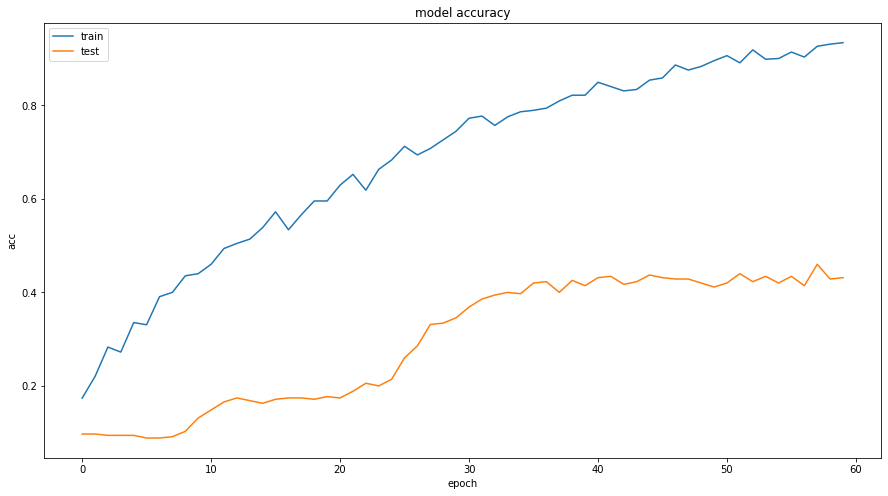

In [61]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 8
plt.figure()
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')

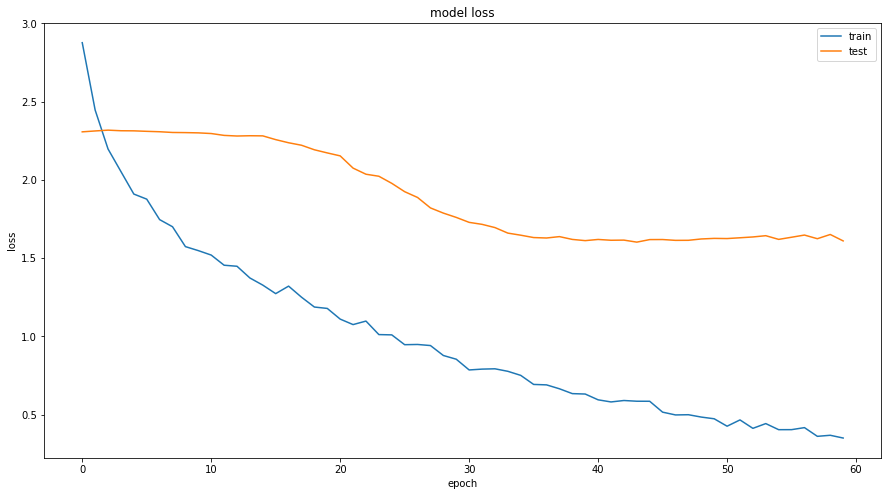

In [62]:
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')

In [63]:
score = model.evaluate(testX, testY, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.610306739807129
Test accuracy: 0.43142858147621155


In [64]:
from sklearn.metrics import confusion_matrix
import numpy as np

test_predictions = model.predict_classes(testX)

cm = confusion_matrix(np.argmax(testY, axis=1), test_predictions)
print(cm)

[[ 8  2  9  2  5  2  1  0  2  4]
 [ 0 29  1  0  0  4  0  0  0  1]
 [ 3  3 11  4  1  1  2  2  5  3]
 [ 3  0  2 11  2  0  1  5  4  7]
 [ 1  1  3  1 11  0  1  8  6  3]
 [ 2  6  5  1  1 14  0  3  3  0]
 [ 2  0  0  0  1  0 28  0  0  4]
 [ 0  1  1  5  3  0  0 24  0  1]
 [ 2  0  3  5  4  1  0  6  9  5]
 [ 4  1  3  8  3  1  5  3  1  6]]


Text(0.5, 1, 'Accuracy Score: 0.43142858147621155')

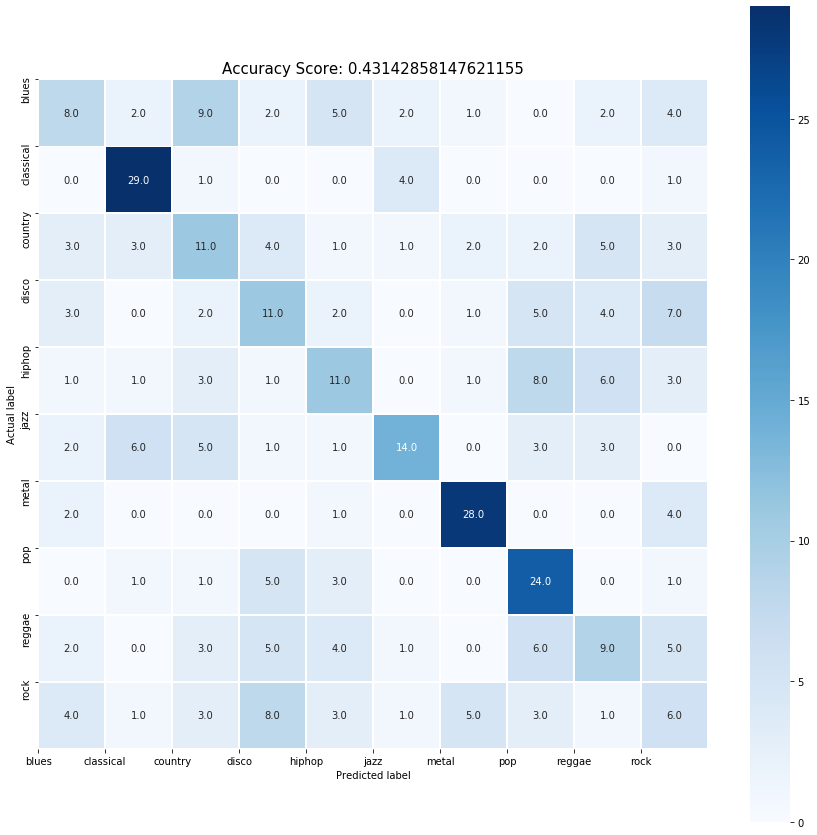

In [65]:
score = model.evaluate(testX, testY, verbose=0)

import seaborn as sns

labels = subFolderList

ax = plt.figure(figsize=(15,15))
sns.heatmap(cm, annot=True, fmt=".1f", linewidths=.5, square = True, cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

plt.xticks(range(10), labels)
plt.yticks(range(10), labels)

all_sample_title = 'Accuracy Score: {0}'.format(score[1])
plt.title(all_sample_title, size = 15)

#### This CNN model which performs better than the prior consists of 2 convolutional layers using 3x3 filters and selu activation. We added one max pooling layer and batch normalization to improve accuracy. We have one fully connected layer with a dropout of 0.5. Our output layer uses softmax activation. 

In [95]:
#Define Model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='selu', input_shape=input_shape))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
#Compile
model.compile(loss=keras.losses.categorical_crossentropy, optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 48, 48, 32)        896       
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 46, 46, 64)        18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 23, 23, 64)        0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 23, 23, 64)        0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 33856)             0         
_________________________________________________________________
dense_18 (Dense)             (None, 64)                2166848   
_________________________________________________________________
dropout_17 (Dropout)         (None, 64)               

In [96]:
history = model.fit(trainX, trainY, batch_size=bs, epochs=30, verbose=1, validation_data=(testX, testY))

Epoch 1/30
21/21 [==============================] - ETA: 0s - loss: 2.2961 - accuracy: 0.25 - ETA: 2s - loss: 3.4063 - accuracy: 0.15 - ETA: 3s - loss: 3.6683 - accuracy: 0.10 - ETA: 3s - loss: 3.4141 - accuracy: 0.11 - ETA: 3s - loss: 3.2157 - accuracy: 0.11 - ETA: 3s - loss: 3.0703 - accuracy: 0.12 - ETA: 3s - loss: 2.9624 - accuracy: 0.12 - ETA: 3s - loss: 2.8789 - accuracy: 0.11 - ETA: 3s - loss: 2.8167 - accuracy: 0.10 - ETA: 2s - loss: 2.7640 - accuracy: 0.10 - ETA: 2s - loss: 2.7209 - accuracy: 0.11 - ETA: 2s - loss: 2.6884 - accuracy: 0.10 - ETA: 2s - loss: 2.6561 - accuracy: 0.12 - ETA: 1s - loss: 2.6297 - accuracy: 0.11 - ETA: 1s - loss: 2.6095 - accuracy: 0.11 - ETA: 1s - loss: 2.5894 - accuracy: 0.11 - ETA: 1s - loss: 2.5720 - accuracy: 0.11 - ETA: 0s - loss: 2.5564 - accuracy: 0.11 - ETA: 0s - loss: 2.5426 - accuracy: 0.11 - ETA: 0s - loss: 2.5300 - accuracy: 0.12 - ETA: 0s - loss: 2.5262 - accuracy: 0.12 - 7s 338ms/step - loss: 2.5262 - accuracy: 0.1200 - val_loss: 2.2870

Epoch 9/30
21/21 [==============================] - ETA: 0s - loss: 1.7821 - accuracy: 0.37 - ETA: 2s - loss: 1.6569 - accuracy: 0.39 - ETA: 3s - loss: 1.6355 - accuracy: 0.39 - ETA: 3s - loss: 1.6655 - accuracy: 0.40 - ETA: 3s - loss: 1.6580 - accuracy: 0.42 - ETA: 3s - loss: 1.7054 - accuracy: 0.39 - ETA: 3s - loss: 1.7499 - accuracy: 0.36 - ETA: 3s - loss: 1.7196 - accuracy: 0.37 - ETA: 3s - loss: 1.6761 - accuracy: 0.39 - ETA: 2s - loss: 1.6753 - accuracy: 0.39 - ETA: 2s - loss: 1.6794 - accuracy: 0.39 - ETA: 2s - loss: 1.6749 - accuracy: 0.40 - ETA: 2s - loss: 1.6713 - accuracy: 0.40 - ETA: 1s - loss: 1.6634 - accuracy: 0.40 - ETA: 1s - loss: 1.6721 - accuracy: 0.39 - ETA: 1s - loss: 1.6896 - accuracy: 0.39 - ETA: 1s - loss: 1.6990 - accuracy: 0.39 - ETA: 0s - loss: 1.6949 - accuracy: 0.39 - ETA: 0s - loss: 1.7018 - accuracy: 0.39 - ETA: 0s - loss: 1.7159 - accuracy: 0.38 - ETA: 0s - loss: 1.7134 - accuracy: 0.38 - 7s 320ms/step - loss: 1.7134 - accuracy: 0.3877 - val_loss: 1.6621

Epoch 17/30
21/21 [==============================] - ETA: 0s - loss: 1.3459 - accuracy: 0.59 - ETA: 2s - loss: 1.3592 - accuracy: 0.56 - ETA: 3s - loss: 1.4698 - accuracy: 0.52 - ETA: 3s - loss: 1.5127 - accuracy: 0.50 - ETA: 3s - loss: 1.4662 - accuracy: 0.50 - ETA: 3s - loss: 1.4647 - accuracy: 0.50 - ETA: 3s - loss: 1.4177 - accuracy: 0.52 - ETA: 3s - loss: 1.4524 - accuracy: 0.50 - ETA: 3s - loss: 1.4681 - accuracy: 0.49 - ETA: 2s - loss: 1.4355 - accuracy: 0.50 - ETA: 2s - loss: 1.4265 - accuracy: 0.51 - ETA: 2s - loss: 1.3979 - accuracy: 0.51 - ETA: 2s - loss: 1.3681 - accuracy: 0.52 - ETA: 1s - loss: 1.3934 - accuracy: 0.51 - ETA: 1s - loss: 1.3933 - accuracy: 0.51 - ETA: 1s - loss: 1.3866 - accuracy: 0.51 - ETA: 1s - loss: 1.3765 - accuracy: 0.51 - ETA: 0s - loss: 1.3921 - accuracy: 0.50 - ETA: 0s - loss: 1.3771 - accuracy: 0.50 - ETA: 0s - loss: 1.3859 - accuracy: 0.50 - ETA: 0s - loss: 1.3857 - accuracy: 0.50 - 7s 310ms/step - loss: 1.3857 - accuracy: 0.5046 - val_loss: 1.470

Epoch 25/30
21/21 [==============================] - ETA: 0s - loss: 0.8270 - accuracy: 0.68 - ETA: 2s - loss: 0.7547 - accuracy: 0.71 - ETA: 3s - loss: 0.8463 - accuracy: 0.66 - ETA: 3s - loss: 0.7939 - accuracy: 0.69 - ETA: 3s - loss: 0.7878 - accuracy: 0.69 - ETA: 3s - loss: 0.7985 - accuracy: 0.68 - ETA: 3s - loss: 0.8040 - accuracy: 0.69 - ETA: 3s - loss: 0.7641 - accuracy: 0.71 - ETA: 3s - loss: 0.7531 - accuracy: 0.72 - ETA: 3s - loss: 0.7596 - accuracy: 0.71 - ETA: 2s - loss: 0.7830 - accuracy: 0.71 - ETA: 2s - loss: 0.7899 - accuracy: 0.72 - ETA: 2s - loss: 0.8059 - accuracy: 0.71 - ETA: 2s - loss: 0.7926 - accuracy: 0.72 - ETA: 1s - loss: 0.7866 - accuracy: 0.72 - ETA: 1s - loss: 0.7965 - accuracy: 0.71 - ETA: 1s - loss: 0.8161 - accuracy: 0.71 - ETA: 0s - loss: 0.8099 - accuracy: 0.71 - ETA: 0s - loss: 0.8240 - accuracy: 0.70 - ETA: 0s - loss: 0.8328 - accuracy: 0.70 - ETA: 0s - loss: 0.8341 - accuracy: 0.70 - 7s 343ms/step - loss: 0.8341 - accuracy: 0.7046 - val_loss: 1.599

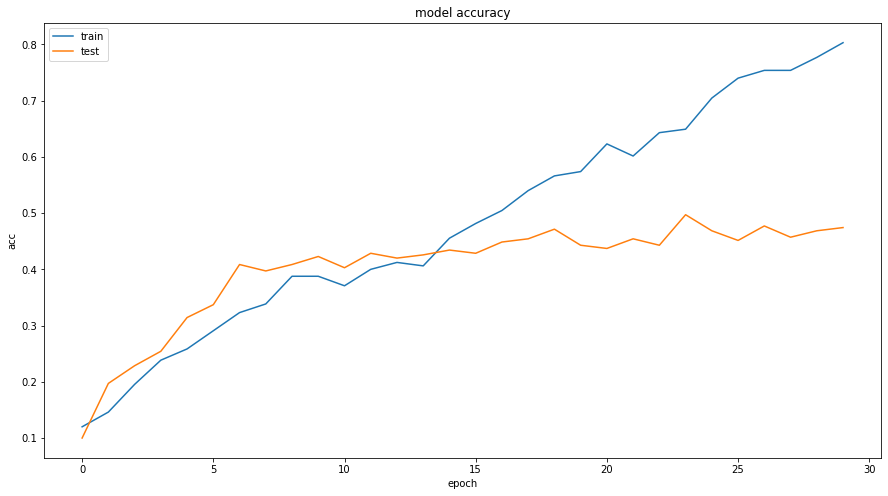

In [100]:
plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')

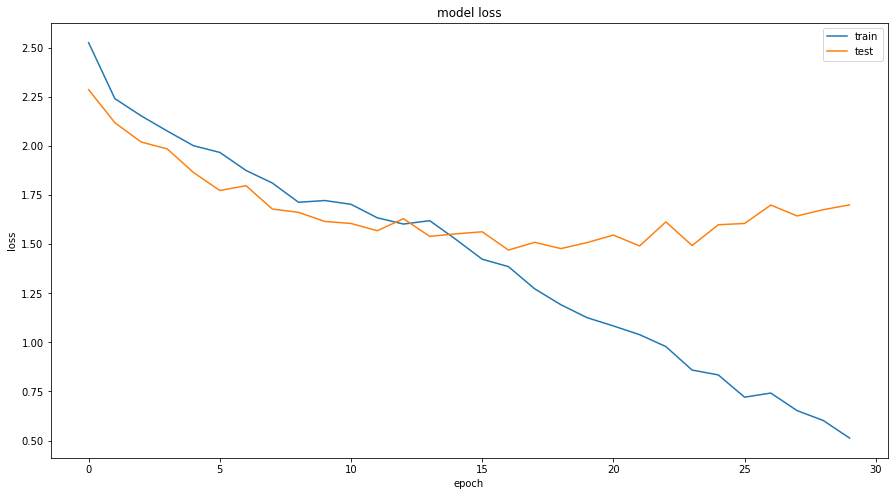

In [101]:
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')

##### Validation Accuracy is 47%

In [103]:
score = model.evaluate(testX, testY, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.7001954317092896
Test accuracy: 0.47428572177886963


In [104]:
from sklearn.metrics import confusion_matrix
import numpy as np

test_predictions = model.predict_classes(testX)

cm = confusion_matrix(np.argmax(testY, axis=1), test_predictions)
print(cm)

[[ 9  1  4  2  4  3  5  0  2  5]
 [ 0 31  1  0  0  3  0  0  0  0]
 [ 1  2  8  1  0  6  1  3  2 11]
 [ 2  0  0 13  4  0  0  2  6  8]
 [ 2  0  1  6 13  0  1  6  5  1]
 [ 1  8  5  1  1 15  0  1  2  1]
 [ 0  0  0  0  3  0 27  1  0  4]
 [ 0  0  2  5  2  0  0 23  1  2]
 [ 1  0  1  7  4  0  1  5 15  1]
 [ 2  1  6  3  2  0  3  3  3 12]]


##### Confusion Matrix

Text(0.5, 1, 'Accuracy Score: 0.47428572177886963')

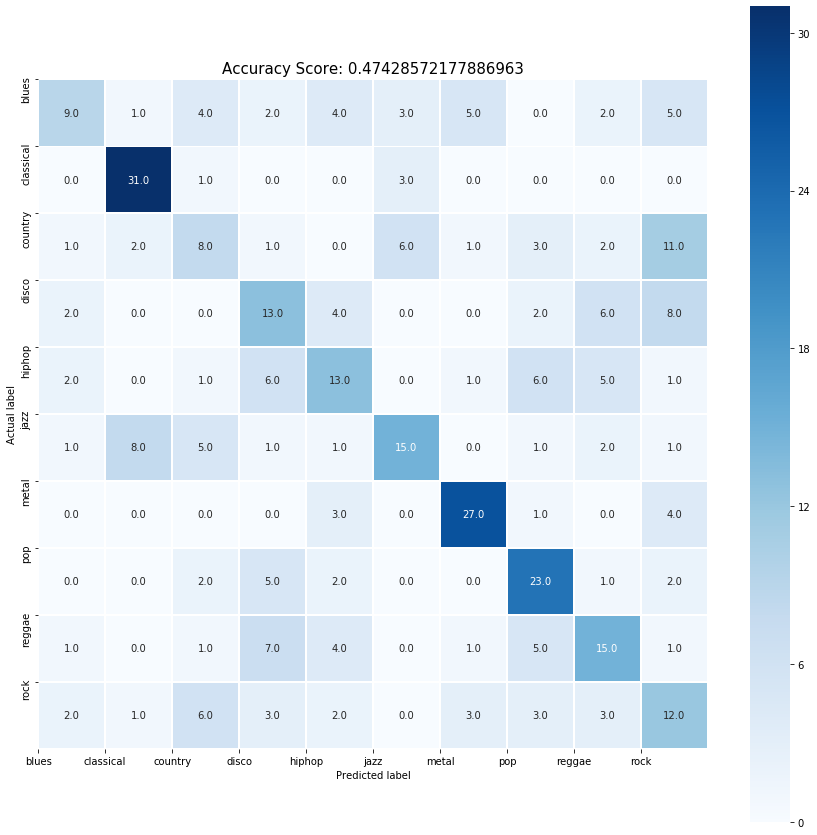

In [105]:
score = model.evaluate(testX, testY, verbose=0)

import seaborn as sns

labels = subFolderList

ax = plt.figure(figsize=(15,15))
sns.heatmap(cm, annot=True, fmt=".1f", linewidths=.5, square = True, cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

plt.xticks(range(10), labels)
plt.yticks(range(10), labels)

all_sample_title = 'Accuracy Score: {0}'.format(score[1])
plt.title(all_sample_title, size = 15)

In [106]:
model.save('cnnmodel.h5')

#### When comparing both models, the second one does a better job of identifying rock, however it seems to confuse country as rock very often. 

#### References
##### https://www.kaggle.com/timolee/audio-data-conversion-to-images-eda